![Final Lesson Exercise](images/Banner_FEX.png)

# Lesson #5: Visualization and Exploratory Data Analysis 
## Good Movies - The IMDb movie dataset

## About this assignment
In this assignment, you will continue to explore information regarding good movies.<br/>

This time you will do so, using exploratory data analysis and visualization of the data.

## Preceding Step - import modules (packages)
This step is necessary in order to use external packages. 

**Use the following libraries for the assignment, when needed**:

In [1]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

from plotchecker import LinePlotChecker, ScatterPlotChecker, BarPlotChecker  # for testing use only
import matplotcheck.base as mpc     # for testing use only
import matplotcheck.notebook as nb  # for testing use only
import os                           # for testing use only
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

## 1. Load and clean the IMDb movie dataset
In this section you will perform the following:
1. Load the IMDB movie dataset
+ Remove duplicates
+ Remove missing string values
+ Repair numeric missing values

### 1.a. Load the IMDB movie dataset

### 1.a. Instructions
<u>method name</u>: <b>load_csv</b>
<pre>The following is expected:
--- Complete the 'load_csv' function to load the 'IMDB' dataset 
    from the csv, located in the 'file_name' parameter into a pandas dataframe.
    You should return a dataframe containing only the columns appearing the 
    'column_names' input parameter. 
</pre>

In [2]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def load_csv(file_name,column_names):
    ###
    return pd.read_csv(file_name, usecols = column_names)
    ###


In [3]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_imdb_movies = load_csv(file_name,col_names)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [4]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [5]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1a. - Test 1 (name: test1a-1_load_csv, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'load_csv' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_imdb_movies = load_csv(file_name,col_names)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'load_csv' function implementation :-)")

Part 1a. - Test 1 (name: test1a-1_load_csv, points: 0.1) - Sanity
	--->Testing the implementation of 'load_csv' ...
Good Job!
You've passed the 1st test for the 'load_csv' function implementation :-)


In [6]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1a. - Test 2 (name: test1a-2_load_csv, points: 0.1)")
print ("\t--->Testing the implementation of 'load_csv' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_imdb_movies = load_csv(file_name,col_names)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 
    
assert df_imdb_movies is not None, "You did not return an object from the function, try again"
assert df_imdb_movies.shape == (2808, 16), 'Wrong dataframe shape, try again'

print ("Good Job!\nYou've passed the 2nd test for the 'load_csv' function implementation :-)")

Part 1a. - Test 2 (name: test1a-2_load_csv, points: 0.1)
	--->Testing the implementation of 'load_csv' ...
Good Job!
You've passed the 2nd test for the 'load_csv' function implementation :-)


### 1.b. Remove duplicates

### 1.b. Instructions
<u>method name</u>: <b>remove_duplicates</b>
<pre>The following is expected:
--- Complete the 'remove_duplicates' function to return a copy of a the given 'df' dataframe,
    after removing the duplicates, based on the 'dup_col_name' parameter.
    The duplication will be considered as such if based on a duplicate value in the 'dup_col_name' column.

    You need to keep the first occurrence of a duplication.  
</pre>

In [7]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def remove_duplicates(df, dup_col_name):
    ###
    df2 = df.copy()
    return df2.drop_duplicates ([dup_col_name])
    ###


In [8]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
dup_col = 'movie_title'
df_imdb_movies = load_csv(file_name,col_names)
df_cln_imdb = remove_duplicates(df_imdb_movies, dup_col)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [9]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [10]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1b. - Test 1 (name: test1b-1_remove_duplicates, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'remove_duplicates' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
dup_col = 'movie_title'

try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = remove_duplicates(df_imdb_movies, dup_col)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'remove_duplicates' function implementation :-)")

Part 1b. - Test 1 (name: test1b-1_remove_duplicates, points: 0.1) - Sanity
	--->Testing the implementation of 'remove_duplicates' ...
Good Job!
You've passed the 1st test for the 'remove_duplicates' function implementation :-)


In [11]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1b. - Test 2 (name: test1b-2_remove_duplicates, points: 0.1)")
print ("\t--->Testing the implementation of 'remove_duplicates' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
dup_col = 'movie_title'

try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = remove_duplicates(df_imdb_movies, dup_col)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 
    
assert df_cln_imdb is not None, "You did not return an object from the 'remove_duplicates' function, try again"
assert df_cln_imdb.shape == (2750, 16), 'Wrong shape for dataframe, after removing duplicates, try again'

print ("Good Job!\nYou've passed the 2nd test for the 'remove_duplicates' function implementation :-)")

Part 1b. - Test 2 (name: test1b-2_remove_duplicates, points: 0.1)
	--->Testing the implementation of 'remove_duplicates' ...
Good Job!
You've passed the 2nd test for the 'remove_duplicates' function implementation :-)


### 1.c. Remove missing string values

### 1.c. Instructions
<u>method name</u>: <b>remove_missing_str_val_rows</b>
<pre>The following is expected:
--- Complete the 'remove_missing_str_val_rows' function to return a copy of a the given 'df' dataframe,
    after removing rows with missing string values.

    Remove all the rows with a missing value in one or more 'string_cols' columns. 
</pre>

In [12]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def remove_missing_str_val_rows(df, string_cols):
    ###
    df2 = df.copy()
    for col in string_cols :
        df2= df2 [df2[col].notna()]
    return df2
    ###


In [13]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
string_cols = ['movie_title', 'director_name', 'actor_1_name'] 
df_imdb_movies = load_csv(file_name,col_names)
df_cln_imdb = remove_missing_str_val_rows(df_imdb_movies, string_cols)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [14]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [15]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1c. - Test 1 (name: test1c-1_remove_missing_str_val_rows, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'remove_missing_str_val_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
string_cols = ['movie_title', 'director_name', 'actor_1_name'] 

try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = remove_missing_str_val_rows(df_imdb_movies, string_cols)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'remove_missing_str_val_rows' function implementation :-)")

Part 1c. - Test 1 (name: test1c-1_remove_missing_str_val_rows, points: 0.1) - Sanity
	--->Testing the implementation of 'remove_missing_str_val_rows' ...
Good Job!
You've passed the 1st test for the 'remove_missing_str_val_rows' function implementation :-)


In [16]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1c. - Test 2 (name: test1c-2_remove_missing_str_val_rows, points: 0.1)")
print ("\t--->Testing the implementation of 'remove_missing_str_val_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
string_cols = ['movie_title', 'director_name', 'actor_1_name'] 

try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = remove_missing_str_val_rows(df_imdb_movies, string_cols)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert df_cln_imdb is not None, "You did not return an object from the 'remove_missing_str_val_rows' function, try again"
assert df_cln_imdb.shape == (2808, 16), 'Wrong dataframe shape, try again'

print ("Good Job!\nYou've passed the 2nd test for the 'remove_missing_str_val_rows' function implementation :-)")

Part 1c. - Test 2 (name: test1c-2_remove_missing_str_val_rows, points: 0.1)
	--->Testing the implementation of 'remove_missing_str_val_rows' ...
Good Job!
You've passed the 2nd test for the 'remove_missing_str_val_rows' function implementation :-)


### 1.d. Repair numeric missing values\

### 1.d. Instructions
<u>method name</u>: <b>repair_numeric_missing_vals</b>
<pre>The following is expected:
--- Complete the 'repair_numeric_missing_vals' function to return a copy of a the given 'df' dataframe,
    after repairing numeric missing values.

    For each column in 'numeric_cols', replace all numeric values, with the median value of that column.  
</pre>

In [17]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def repair_numeric_missing_vals(df, numeric_cols):
    ###
    df2 = df.copy()
    for col in numeric_cols :
        m= df2[col].mean()
        df2[col].fillna(value =m , inplace = True)
    return df2
    ###


In [18]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
numeric_cols = ['title_year','duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_imdb_movies = load_csv(file_name,col_names)
df_cln_imdb = repair_numeric_missing_vals(df_imdb_movies, numeric_cols)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [19]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [20]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1d. - Test 1 (name: test1d-1_repair_numeric_missing_vals, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'repair_numeric_missing_vals' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
numeric_cols = ['title_year','duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = repair_numeric_missing_vals(df_imdb_movies, numeric_cols)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'repair_numeric_missing_vals' function implementation :-)")

Part 1d. - Test 1 (name: test1d-1_repair_numeric_missing_vals, points: 0.1) - Sanity
	--->Testing the implementation of 'repair_numeric_missing_vals' ...
Good Job!
You've passed the 1st test for the 'repair_numeric_missing_vals' function implementation :-)


In [21]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1d. - Test 2 (name: test1d-2_repair_numeric_missing_vals, points: 0.1)")
print ("\t--->Testing the implementation of 'repair_numeric_missing_vals' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
numeric_cols = ['title_year','duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = repair_numeric_missing_vals(df_imdb_movies, numeric_cols)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert df_cln_imdb is not None, "You did not return an object from the 'repair_numeric_missing_vals' function, try again"
assert df_cln_imdb.shape == (2808, 16), 'Wrong dataframe shape, try again'

print ("Good Job!\nYou've passed the 2nd test for the 'repair_numeric_missing_vals' function implementation :-)")

Part 1d. - Test 2 (name: test1d-2_repair_numeric_missing_vals, points: 0.1)
	--->Testing the implementation of 'repair_numeric_missing_vals' ...
Good Job!
You've passed the 2nd test for the 'repair_numeric_missing_vals' function implementation :-)


In [22]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1d. - Test 3 (name: test1d-3_repair_numeric_missing_vals, points: 0.2)")
print ("\t--->Testing the implementation of 'repair_numeric_missing_vals' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5b.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
dup_col = 'movie_title'
string_cols = ['movie_title', 'director_name', 'actor_1_name'] 
numeric_cols = ['title_year','duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_imdb_movies = load_csv(file_name,col_names)
    df_cln_imdb = remove_duplicates(df_imdb_movies, dup_col)
    df_cln_imdb = remove_missing_str_val_rows(df_cln_imdb, string_cols)
    df_cln_imdb = repair_numeric_missing_vals(df_cln_imdb, numeric_cols)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise

assert df_cln_imdb.shape == (2750, 16), 'Wrong dataframe shape, try again'
assert df_cln_imdb[df_cln_imdb.isnull().T.any()].shape == (0, 16), "After basic data cleaning, you shouldn't have any missing values"

df_cln_imdb['facenumber_in_poster'] = df_cln_imdb['facenumber_in_poster'].astype('int32')
df_cln_imdb['num_critic_for_reviews'] = df_cln_imdb['num_critic_for_reviews'].astype('int32')
print('Head of clean dataframe:')
print('------------------------------')
df_cln_imdb.head()
print('------------------------------')
print ("Good Job!\nYou've passed the 3rd test for the 'repair_numeric_missing_vals' function implementation :-)")

Part 1d. - Test 3 (name: test1d-3_repair_numeric_missing_vals, points: 0.2)
	--->Testing the implementation of 'repair_numeric_missing_vals' ...
Head of clean dataframe:
------------------------------
------------------------------
Good Job!
You've passed the 3rd test for the 'repair_numeric_missing_vals' function implementation :-)


## 2. Most frequent elements - One dimensional visualization 
In this section you will perform a visualization of the most frequent values, for given columns.<br />

You will do this in three steps:
1. Acquire most frequent elements
+ Plot one dimensional plots
+ Combine these two parts to plot one dimensional visualization of most frequent elements 

### 2.a. Acquire most frequent elements

### 2.a. Instructions
<u>method name</u>: <b>get_frequent_elements</b>
<pre>The following is expected:
--- Complete the 'get_frequent_elements' function to return a series of the 'num_top_elements'
    most frequent elements for the given 'col_name' column out of the given 'df' dataframe.
    Example: series of the top 5 elements for column 'my_column' in the dataframe 'my_dataframe'.
   
Return a series, with sorted values of the top frequent element, in an ascending order.

Note: The elements should be sorted by the element values and NOT by the frequency. 
</pre>

In [23]:
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def get_frequent_elements(df, col_name, num_top_elements):
    ###
    df_freq= df.copy()
    df_freq= df_freq[col_name].value_counts()[:num_top_elements].sort_index()
    return df_freq
    ###


In [24]:
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_cln_imdb = load_csv(file_name,col_names)
sr_freq_directors = get_frequent_elements(df_cln_imdb, 'director_name', 11)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [25]:
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [26]:
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2a. - Test 1 (name: test2a-1_get_frequent_elements, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'get_frequent_elements' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_cln_imdb = load_csv(file_name,col_names)
    sr_freq_directors = get_frequent_elements(df_cln_imdb, 'director_name', 11)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'get_frequent_elements' function implementation :-)")


Part 2a. - Test 1 (name: test2a-1_get_frequent_elements, points: 0.1) - Sanity
	--->Testing the implementation of 'get_frequent_elements' ...
Good Job!
You've passed the 1st test for the 'get_frequent_elements' function implementation :-)


In [27]:
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2a. - Test 2 (name: test2a-2_get_frequent_elements, points: 0.3)")
print ("\t--->Testing the implementation of 'get_frequent_elements' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_cln_imdb = load_csv(file_name,col_names)
    sr_freq_directors = get_frequent_elements(df_cln_imdb, 'director_name', 11)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert sr_freq_directors is not None, "You did not return an object from the 'get_frequent_elements' function, try again"
minmax_freq = (sr_freq_directors.min(), sr_freq_directors.max())
assert minmax_freq == (10, 17), 'Wrong minimum and maximum values for the frequent elements series'
assert sr_freq_directors.index[2].strip() == "John Carpenter", "Wrong element order, try fixing your code"

print('Head of sorted frequent elements series:')
print('------------------------------')
print(sr_freq_directors.head())
print('------------------------------')
print ("Good Job!\nYou've passed the 2nd test for the 'get_frequent_elements' function implementation :-)")

Part 2a. - Test 2 (name: test2a-2_get_frequent_elements, points: 0.3)
	--->Testing the implementation of 'get_frequent_elements' ...
Head of sorted frequent elements series:
------------------------------
Barry Levinson     10
Clint Eastwood     16
John Carpenter     10
Martin Scorsese    10
Oliver Stone       10
Name: director_name, dtype: int64
------------------------------
Good Job!
You've passed the 2nd test for the 'get_frequent_elements' function implementation :-)


### 2.b. One dimensional plots 
In this section you need to plot one dimensional plots.
You will need to plot one of the following plots:
1. A 'bar' plot
+ A 'pie' plot
+ A 'line' plot

IMPORTANT NOTE:
* DO NOT explicitly display the figure (remove plt.show())

### 2.b. Instructions
<u>method name</u>: <b>one_dim_plot</b>
<pre>The following is expected:
--- Complete the 'one_dim_plot' function to plot the given 'sr' series.

    Input parameters:
    - 'sr' - a series containing values and their frequency (count). 
             * The index of the series represents the values.
             * The values could be numbers of strings.
    - 'plot_type' - the type of the plot, which you need to plot.
                    * There are three possible plot types:  'bar', 'pie' or 'line'.
    - 'axis'      - the axis which you need to plot into.  
                    * Depending on the plot type you will use, you could set the 
                      plot destination of the plot, using ax=axis, or using
                      axis.plot or axis.bar and so on.
IMPORTANT NOTES:
* DO NOT create new axes or figures. 
* DO NOT explicitly display the figure (remove plt.show()) 
</pre>

In [28]:
# 2.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def one_dim_plot(sr, plot_type, axis):
    ###
    sr.plot (kind =plot_type ,ax=axis)
    ###


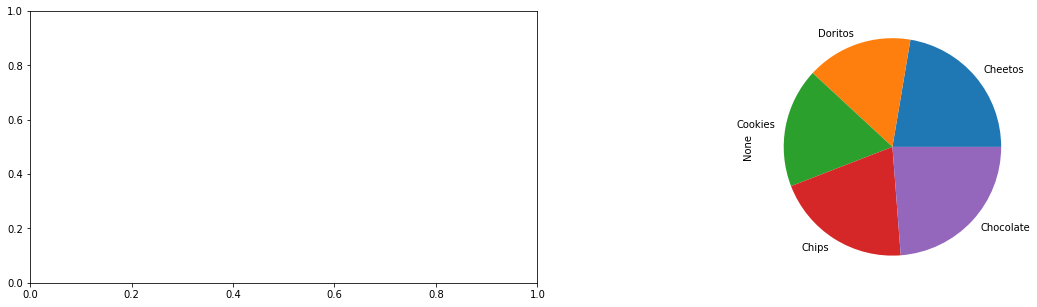

In [29]:
# 2.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_flowers = pd.Series([10, 20, 15, 12], index=['Lily', 'Orchid', 'Rose', 'Violet'])
sr_snaks = pd.Series([7.8, 5.5, 6.2, 7.1, 8.3], index=['Cheetos', 'Doritos', 'Cookies', 'Chips', 'Chocolate'])
df_cln_imdb = load_csv(file_name,col_names)
one_dim_plot(sr_snaks, 'pie', axes[1])
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [30]:
# 2.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


Part 2b. - Test 1 (name: test2b-1_one_dim_plot, points: 0.1) - Sanity
	--->Testing the implementation of 'one_dim_plot' ...
Good Job!
You've passed the 1st test for the 'one_dim_plot' function implementation :-)


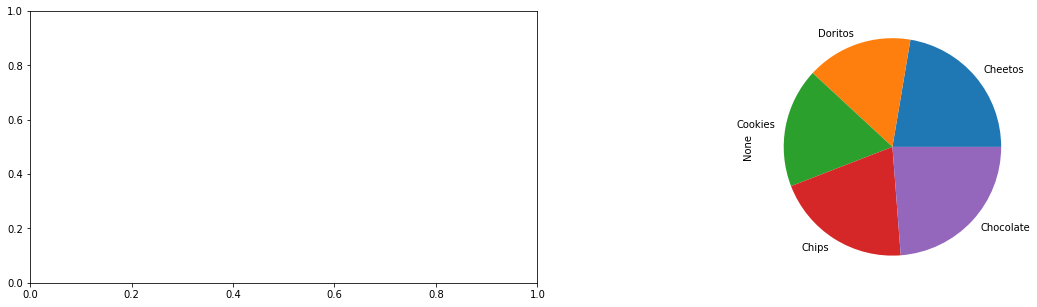

In [31]:
# 2.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2b. - Test 1 (name: test2b-1_one_dim_plot, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'one_dim_plot' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']

fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_flowers = pd.Series([10, 20, 15, 12], index=['Lily', 'Orchid', 'Rose', 'Violet'])
sr_snaks = pd.Series([7.8, 5.5, 6.2, 7.1, 8.3], index=['Cheetos', 'Doritos', 'Cookies', 'Chips', 'Chocolate'])

try:
    df_cln_imdb = load_csv(file_name,col_names)
    
    one_dim_plot(sr_snaks, 'pie', axes[1])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'one_dim_plot' function implementation :-)")

Part 2b. - Test 2 (name: test2b-2_one_dim_plot, points: 0.2)
	--->Testing the implementation of 'one_dim_plot' ...
Good Job!
You've passed the 2nd test for the 'one_dim_plot' function implementation :-)


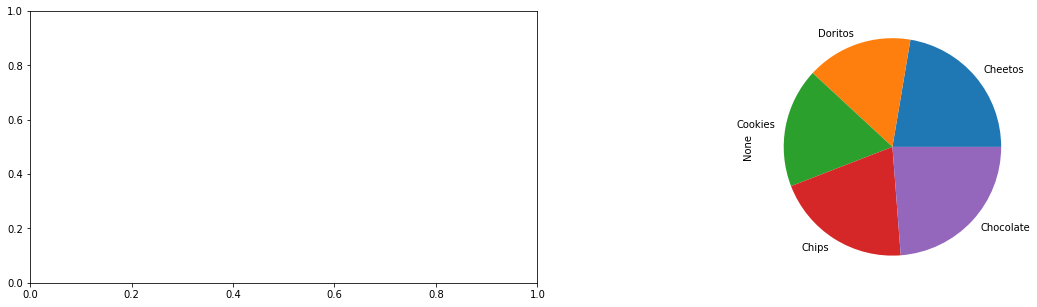

In [32]:
# 2.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2b. - Test 2 (name: test2b-2_one_dim_plot, points: 0.2)")
print ("\t--->Testing the implementation of 'one_dim_plot' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
fig, axes = plt.subplots(1,2, figsize=(20,5))
sr_flowers = pd.Series([10, 20, 15, 12], index=['Lily', 'Orchid', 'Rose', 'Violet'])
sr_snaks = pd.Series([7.8, 5.5, 6.2, 7.1, 8.3], index=['Cheetos', 'Doritos', 'Cookies', 'Chips', 'Chocolate'])
try:
    df_cln_imdb = load_csv(file_name,col_names)
    one_dim_plot(sr_snaks, 'pie', axes[1])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert mpl.patches.Wedge in [type(chld) for chld in axes[1].get_children()], 'Wrong plot type, it must be a pie plot'
num_of_elements = sum([1 for chld in axes[1].get_children() if mpl.patches.Wedge==type(chld)])
assert num_of_elements == sr_snaks.shape[0], 'Wrong number of pie plot elements'  

print ("Good Job!\nYou've passed the 2nd test for the 'one_dim_plot' function implementation :-)")

Part 2b. - Test 3 (name: test2b-3_one_dim_plot, points: 0.3)
	--->Testing the implementation of 'one_dim_plot' ...

Good Job!
You've passed the 3rd test for the implementation of the 'one_dim_plot' method :-)


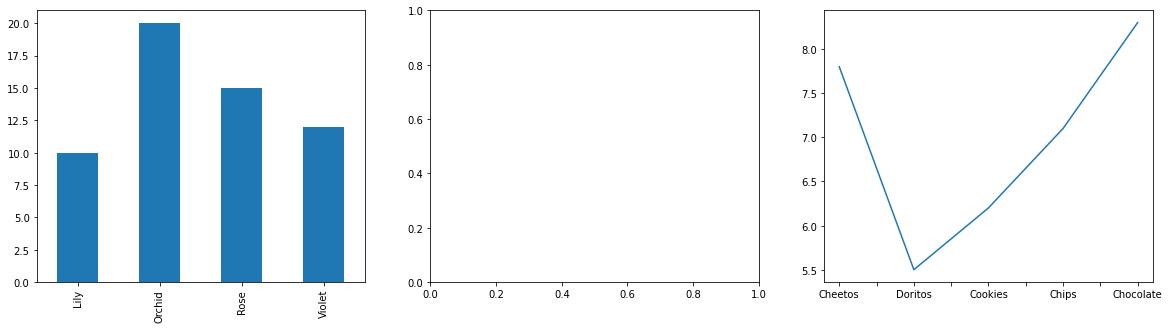

In [33]:
# 2.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2b. - Test 3 (name: test2b-3_one_dim_plot, points: 0.3)")
print ("\t--->Testing the implementation of 'one_dim_plot' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
fig, axes = plt.subplots(1,3, figsize=(20,5))
sr_flowers = pd.Series([10, 20, 15, 12], index=['Lily', 'Orchid', 'Rose', 'Violet'])
sr_snaks = pd.Series([7.8, 5.5, 6.2, 7.1, 8.3], index=['Cheetos', 'Doritos', 'Cookies', 'Chips', 'Chocolate'])
try:
    one_dim_plot(sr_flowers,'bar', axes[0])
    one_dim_plot(sr_snaks, 'line', axes[2])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

plot_tester0 = mpc.PlotTester(axes[0])
plot_tester0.assert_plot_type('bar')
bpc0 = BarPlotChecker(axes[0])
height_vals = [val for val in bpc0.heights]
assert min(height_vals)==sr_flowers.min(), 'Mismatch of the minimum value between series and plot values'

plot_tester1 = mpc.PlotTester(axes[2])
plot_tester1.assert_plot_type('line')
lpc1 = LinePlotChecker(axes[2])
lpc1.assert_num_lines(1)    
y_data = np.array([val for val in lpc1.y_data])
assert round(y_data.mean(), 2) == round(np.sort(sr_snaks.values).mean(), 2)

print ("\nGood Job!\nYou've passed the 3rd test for the implementation of the 'one_dim_plot' method :-)")

### 2.c. Most Frequent elements - one dimensional visualization
In this section you will perform a visualization of the most frequent values, for given columns, using three types of plots: pie, bar and line.

### The parameters of the 'plot_frequent_elements' function
In the next answer code cell, you'll need to implement the 'plot_frequent_elements' function<br /> to plot the most frequent elements for the columns of a given dataframe.<br />

**The following explains the input parameters of the function**:
- 'df' - the input dataframe, for which you need to find the most frequent elements.
- 'df_params' - the input parameters in a dataframe. <br />
  The 'df_params' dataframe includs the following information:
  * The 'col_name' column refers to the column names, for which you should plot the most frequent values.
  * The 'plot_type' column refers to the type of the plot you should plot for the corresponding column (appearing in the same row). 
     * The possible options are: 'bar', 'pie' or 'line'.
     * The same plot type can repeat in different rows, but could also be distinct.
   * The 'num_top_elements' column refers to the number of most frequent elements, you should plot.

**Notes**:
* Assume that the number of rows in the 'df_params' dataframe is between 1 to 3.
* Use the 'get_frequent_elements' and the 'one_dim_plot' functions which you've already implemented.
* You are advised to call these functions in a similar way to the way they were called in the above test code cells.

#### An example for a 'df_params' dataframe:

| | col_name | plot_type | num_top_elements |
| :- | :- | :- | :- |
| 0 | 'director_name' | 'bar' | 10 |
| 1 | 'actor_1_name' | 'line' | 5 |

*What is expected to do in this example*:
- You will need to create 2 subplots, one for each row in the dataframe.
  * The first subplot, should correspond to the 'director_name  column' <br />
    and the second subplot to the 'actor_1_name' column.
- You need to plot the 10 most frequent elements from the 'director_name' column on the left subplot 
  and the 5 most frequent elements from the 'actor_1_name' column on the right subplot.
  * Frequency refers to the number of times an element appears in the column. 
- The left subplot should be a 'bar' and the right subplot should be a 'line'.

### 2.c. Instructions
<u>method name</u>: <b>plot_frequent_elements</b>
<pre>The following is expected:
--- Complete the 'plot_frequent_elements' function to plot the most frequent elements for columns from
    the given 'df' dataframe. 
    * Use the 'get_frequent_elements' and the 'one_dim_plot' functions which you've already implemented.
    * You are advised to call these functions in a similar way, to the way it was done in the above test code cells.

The input parameters, as well as some instructions are explained in the above (markdown) cell.

Additional instructions:
* The plots should be in the same row using subplots.
   * The order of the plots should be in the same order of the rows in the 'df_in_params' dataframe.
   * The first subplot should appear on the left most subplot (and the last one on the right most subplot).
* You need to sort the values of the top frequent element in an ascending order.
    * The elements should be sorted by the element values and NOT by the frequency.
* For each subplot, the x axis should refer to the values and the y axis should refer to their frequency.
  
IMPORTANT NOTE:
* DO NOT explicitly display the figure (remove plt.show())
</pre>

In [34]:
# 2.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def plot_frequent_elements(df, df_in_params):
    ###
    i=0
    fig, axes= plt.subplots(1, 3, figsize=(20,5))
    
    for indexs in df_in_params.index :
        
        sr = get_frequent_elements(df , df_in_params["col_name"][indexs], df_in_params["num_top_elements"][indexs])
        one_dim_plot(sr , df_in_params ["plot_type"][indexs] , axes[i])
        i = i+1
    ###


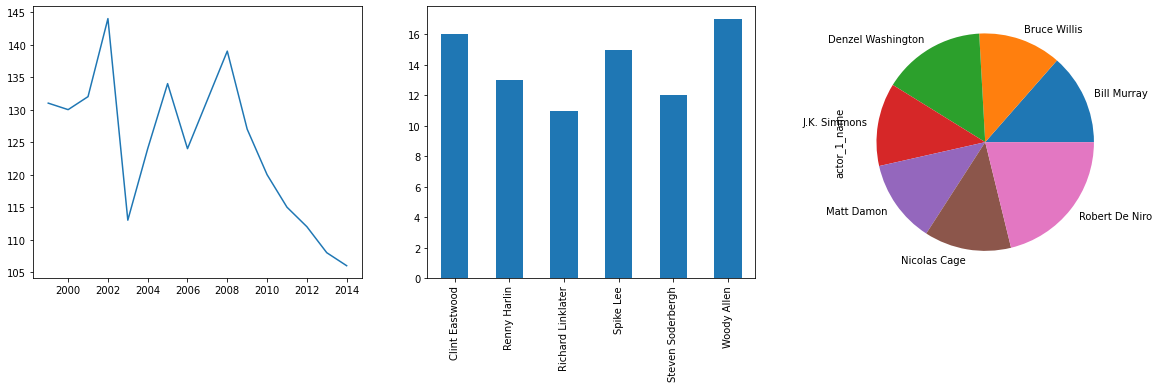

In [35]:
# 2.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_params = pd.DataFrame({'plot_type': ['line', 'bar', 'pie'], 
                          'col_name': ['title_year', 'director_name', 'actor_1_name'],
                          'num_top_elements': [15,6,7]})
df_cln_imdb = load_csv(file_name,col_names)
plot_frequent_elements(df_cln_imdb, df_params)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [36]:
# 2.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


Part 2c. - Test 1 (name: test2c-1_plot_frequent_elements, points: 0.1) - Sanity
	--->Testing the implementation of 'plot_frequent_elements' ...

Good Job!
You've passed the 1st test for the implementation of the 'plot_frequent_elements' method :-)


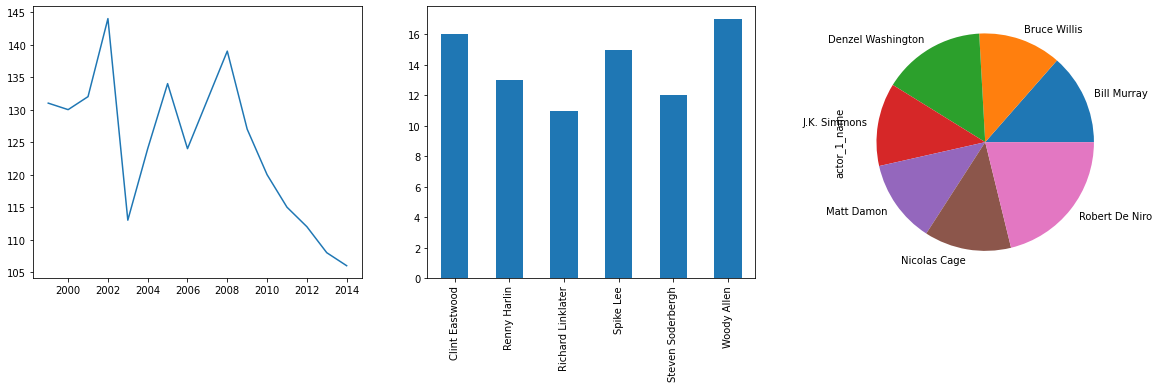

In [37]:
# 2.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2c. - Test 1 (name: test2c-1_plot_frequent_elements, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'plot_frequent_elements' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_params = pd.DataFrame({'plot_type': ['line', 'bar', 'pie'], 
                          'col_name': ['title_year', 'director_name', 'actor_1_name'],
                          'num_top_elements': [15,6,7]})
try:
    df_cln_imdb = load_csv(file_name,col_names)
    plot_frequent_elements(df_cln_imdb, df_params)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 
    
print ("\nGood Job!\nYou've passed the 1st test for the implementation of the 'plot_frequent_elements' method :-)")

Part 2c. - Test 2 (name: test2c-2_plot_frequent_elements, points: 0.4)
	--->Testing the implementation of 'plot_frequent_elements' ...

Good Job!
You've passed the 2nd test for the implementation of the 'plot_frequent_elements' method :-)


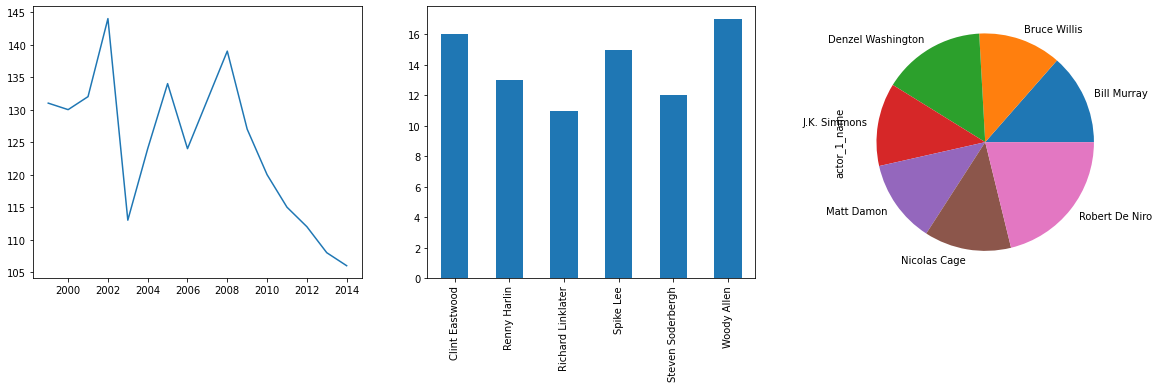

In [38]:
# 2.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2c. - Test 2 (name: test2c-2_plot_frequent_elements, points: 0.4)")
print ("\t--->Testing the implementation of 'plot_frequent_elements' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_params = pd.DataFrame({'plot_type': ['line', 'bar', 'pie'], 
                          'col_name': ['title_year', 'director_name', 'actor_1_name'],
                          'num_top_elements': [15,6,7]})
try:
    df_cln_imdb = load_csv(file_name,col_names)
    plot_frequent_elements(df_cln_imdb, df_params)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

all_axes = plt.gcf().get_axes()
assert len(all_axes)==3, 'Wrong number of subplots, try again'

plot_testers = [mpc.PlotTester(all_axes[n_axis]) for n_axis in range(len(all_axes))]
for n_plot in range(3):
    plot_type = df_params['plot_type'].iloc[n_plot]
    col_name = df_params['col_name'].iloc[n_plot]
    n_elements = df_params['num_top_elements'].iloc[n_plot]
    curr_tested_axis = all_axes[n_plot]
    df_col = df_cln_imdb[col_name]
    
    if plot_type in ['line', 'bar']:
        plot_testers[n_plot].assert_plot_type(plot_type)
        if plot_type == 'bar':
            bpc = BarPlotChecker(curr_tested_axis)
            bpc.assert_num_bars(n_elements)
        else:
            lpc = LinePlotChecker(curr_tested_axis)
            lpc.assert_num_lines(1)    
    else: # plot_type == 'pie'
        plot_cls_types =  [type(chld) for chld in curr_tested_axis.get_children()]
        assert mpl.patches.Wedge in plot_cls_types, 'Wrong plot type, must be a pie plot'

print ("\nGood Job!\nYou've passed the 2nd test for the implementation of the 'plot_frequent_elements' method :-)")

Part 2c. - Test 3 (name: test2c-3_plot_frequent_elements, points: 0.5)
	--->Testing the implementation of 'plot_frequent_elements' ...

Good Job!
You've passed the 3rd test for the implementation of the 'plot_frequent_elements' method :-)


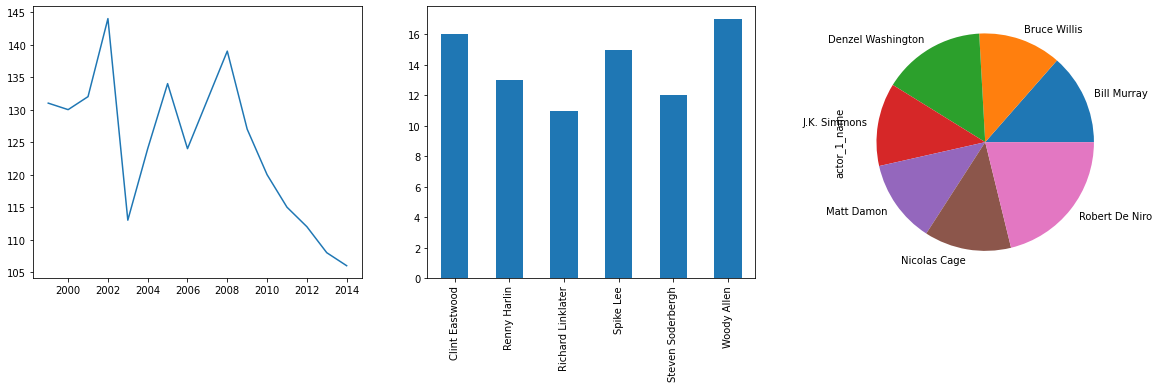

In [39]:
# 2.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 2c. - Test 3 (name: test2c-3_plot_frequent_elements, points: 0.5)")
print ("\t--->Testing the implementation of 'plot_frequent_elements' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_params = pd.DataFrame({'plot_type': ['line', 'bar', 'pie'], 
                          'col_name': ['title_year', 'director_name', 'actor_1_name'],
                          'num_top_elements': [15,6,7]})
try:
    df_cln_imdb = load_csv(file_name,col_names)
    plot_frequent_elements(df_cln_imdb, df_params)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

all_axes = plt.gcf().get_axes()

plot_testers = [mpc.PlotTester(all_axes[n_axis]) for n_axis in range(len(all_axes))]
for n_plot in range(3):
    plot_type = df_params['plot_type'].iloc[n_plot]
    col_name = df_params['col_name'].iloc[n_plot]
    n_elements = df_params['num_top_elements'].iloc[n_plot]
    curr_tested_axis = all_axes[n_plot]
    df_col = df_cln_imdb[col_name]
    
    if plot_type in ['line', 'bar']:
        if plot_type == 'bar':
            bpc = BarPlotChecker(curr_tested_axis)
            height_vals = [val for val in bpc.heights]
            freq_val = df_col.mode().iloc[0]
            assert max(height_vals)==df_col[df_col==freq_val].count(), 'Wrong frequency for the most frequent element'
        else:
            lpc = LinePlotChecker(curr_tested_axis)
            y_data = np.array([val for val in lpc.y_data])
            (values,counts) = np.unique(df_col.values,return_counts=True)
            assert round(y_data.mean(), 2) == round(np.sort(counts)[::-1][:n_elements].mean(), 2)
    else: # plot_type == 'pie'
        assert sum([1 for chld in curr_tested_axis.get_children() if mpl.patches.Wedge==type(chld)]) ==n_elements, 'Wrong number of pie plot elements'  
        
print ("\nGood Job!\nYou've passed the 3rd test for the implementation of the 'plot_frequent_elements' method :-)") 

## 3. Correlation - Two dimensional visualization 
In this section you will perform exploration and visualization of two features, including:
* A cross tabulation of two discrete features in a dataframe and its two dimensional visualization.
* A plot of columns with high correlation, determined by the Pearson correlation coefficient.
* Two dimensional scatter and line plots.

### 3.a. Cross tabulation

### 3.a. Instructions
<u>method name</u>: <b>cross_tabulation</b>
<pre>The following is expected:
--- Complete the 'cross_tabulation' function to create and return a datadrame of a cross tabulation between
    the given 'col_name' column and the given 'other_col_name' column.

Note:
      * The 'col_name' column's values, should function as your output dataframe's index and the
        'other_col_name' column's values, should function as column names.  
</pre>

In [40]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def cross_tabulation(df, col_name, other_col_name):
    ###
    return pd.crosstab (df[col_name] , df[other_col_name] , normalize = "index")
    ###


In [41]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5d.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_cln_processed_imdb = load_csv(file_name,col_names)
df_crosstab = cross_tabulation(df_cln_processed_imdb, 'title_year', 'facenumber_in_poster')
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [42]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [43]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3a. - Test 1 (name: test3a-1_cross_tabulation, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'cross_tabulation' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5d.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes'] 

try:
    df_cln_processed_imdb = load_csv(file_name,col_names)
    df_crosstab = cross_tabulation(df_cln_processed_imdb, 'title_year', 'facenumber_in_poster')
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("\nGood Job!\nYou've passed the 1st test for the implementation of the 'cross_tabulation' method :-)")

Part 3a. - Test 1 (name: test3a-1_cross_tabulation, points: 0.1) - Sanity
	--->Testing the implementation of 'cross_tabulation' ...

Good Job!
You've passed the 1st test for the implementation of the 'cross_tabulation' method :-)


In [44]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3a. - Test 2 (name: test3a-2_cross_tabulation, points: 0.2)")
print ("\t--->Testing the implementation of 'cross_tabulation' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5d.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_processed_imdb = load_csv(file_name,col_names)
    df_crosstab = cross_tabulation(df_cln_processed_imdb, 'title_year', 'facenumber_in_poster')
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert df_crosstab is not None, "You did not return an object from the function, try again"
assert [str(val) for val in df_crosstab.columns] == ['0.5', '2.0'], 'Wrong column names'
assert df_crosstab.index[2] == 1997, 'Wrong 3rd index value'
assert round(df_crosstab.values.mean(), 1)==0.5, 'Wrong mean value for cross tabulation dataframe'

print(df_crosstab.head())
print('--------------------------------')
print ("\nGood Job!\nYou've passed the 2nd test for the implementation of the 'cross_tabulation' method :-)")

Part 3a. - Test 2 (name: test3a-2_cross_tabulation, points: 0.2)
	--->Testing the implementation of 'cross_tabulation' ...
facenumber_in_poster       0.5       2.0
title_year                              
1995                  0.750000  0.250000
1996                  0.517241  0.482759
1997                  0.596774  0.403226
1998                  0.656716  0.343284
1999                  0.684783  0.315217
--------------------------------

Good Job!
You've passed the 2nd test for the implementation of the 'cross_tabulation' method :-)


### 3.b. Cross tabulation plot

### 3.b. Instructions
<u>method name</u>: <b>plot_cross_tabulation</b>
<pre>The following is expected:
--- Complete the 'plot_cross_tabulation' function to create a cross tabulation for each of the 
    columns in the given 'col_names' with the other given 'other_col_name' column.
    You should plot a 'line' plot for each dataframe of the cross tabulation.

Notes: 
* You are advised to use your above implementation of 'cross_tabulation'.
* Each row in the cross tabulation should be normalized by the values of that row.
* Use subplots to plot the scatter plots, with up to 5 subplots a row.
  * Assume there are not more than one row of subplots (i.e., maximum 5 subplots)
</pre>

In [45]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def plot_cross_tabulation(df, col_names, other_col_name):
    ###
    fig , axes = plt.subplots (1 , len(col_names) , figsize = (20 , 5))
    
    for idx , col in enumerate (col_names) :
        crosstab = cross_tabulation (df , col , other_col_name)
        crosstab.plot (kind = "line" , ax = axes[idx])
    ###


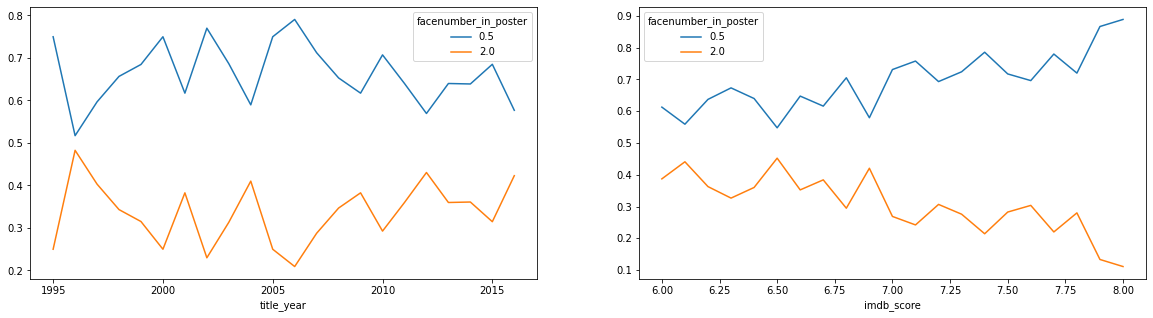

In [46]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5d.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_cln_processed_imdb = load_csv(file_name,col_names)
plot_cross_tabulation(df_cln_processed_imdb, ['title_year','imdb_score'], 'facenumber_in_poster')
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [47]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


Part 3b. - Test 1 (name: test3b-1_plot_cross_tabulation, points: 0.1) - Sanity
	--->Testing the implementation of 'plot_cross_tabulation' ...

Good Job!
You've passed the 1st test for the implementation of the 'plot_cross_tabulation' method :-)


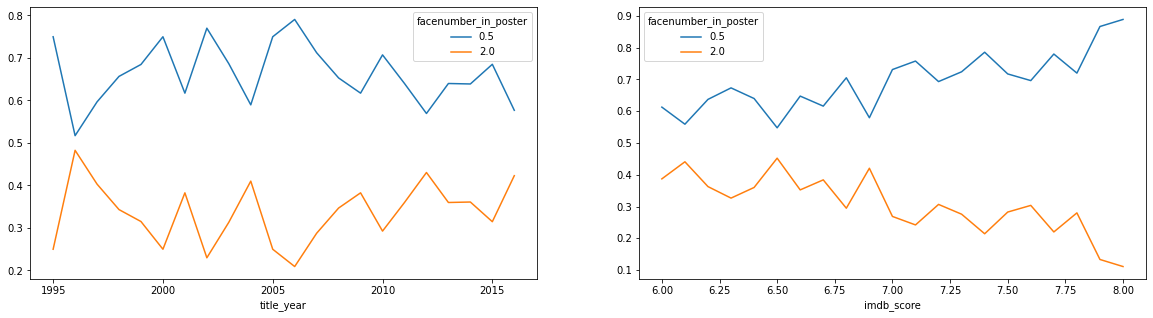

In [48]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3b. - Test 1 (name: test3b-1_plot_cross_tabulation, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'plot_cross_tabulation' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5d.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_cln_processed_imdb = load_csv(file_name,col_names)
    plot_cross_tabulation(df_cln_processed_imdb, ['title_year','imdb_score'], 'facenumber_in_poster')
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("\nGood Job!\nYou've passed the 1st test for the implementation of the 'plot_cross_tabulation' method :-)")

Part 3b. - Test 2 (name: test3b-2_plot_cross_tabulation, points: 0.3)
	--->Testing the implementation of 'plot_cross_tabulation' ...

Good Job!
You've passed the 2nd test for the implementation of the 'plot_cross_tabulation' method :-)


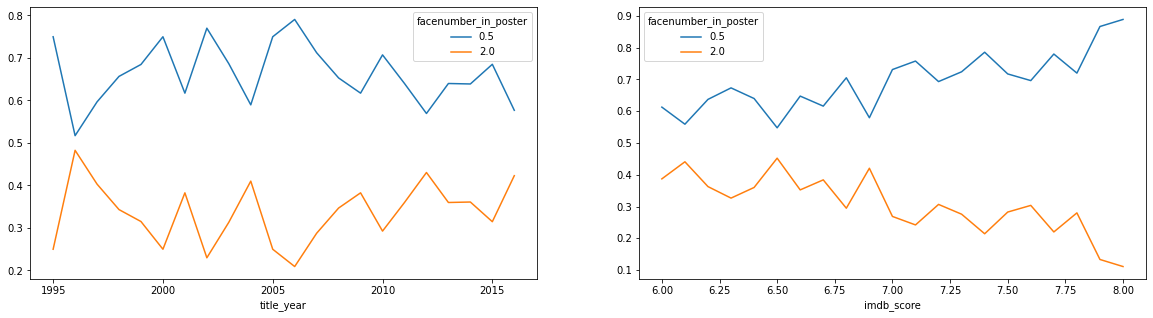

In [49]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3b. - Test 2 (name: test3b-2_plot_cross_tabulation, points: 0.3)")
print ("\t--->Testing the implementation of 'plot_cross_tabulation' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5d.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
try:
    df_cln_processed_imdb = load_csv(file_name,col_names)
    plot_cross_tabulation(df_cln_processed_imdb, ['title_year','imdb_score'], 'facenumber_in_poster')
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

all_axes = plt.gcf().get_axes()
assert len(all_axes)==2, 'Wrong number of subplots'
cols=['title_year','imdb_score']
plot_testers = [mpc.PlotTester(all_axes[n_axis]) for n_axis in range(len(all_axes))]
lpc_testers  = [LinePlotChecker(all_axes[n_axis]) for n_axis in range(len(all_axes))]
lines   = [np.array([val for val in lpc_testers[n_plot].y_data]) for n_plot in range(2)]
line_diffs = [lines[n_plot][0]-lines[n_plot][1] for n_plot in range(2)]
change_sign = lambda arr: arr if arr.max() > 0 else -arr
line_diffs = [change_sign(line_diff) for line_diff in line_diffs]
for n_plot in range(2):
    curr_tested_axis = all_axes[n_plot]
    plot_testers[n_plot].assert_plot_type('line')
    lpc_testers[n_plot].assert_num_lines(2)   
    assert line_diffs[n_plot].min()>0, 'All the values of the top line for %s should be above the bottom line' %(cols[n_plot])
    assert round(line_diffs[n_plot].mean(), 2) == [0.33, 0.39][n_plot], 'Wrong mean diff value for the %s column' %(cols[n_plot])
    assert round(np.median(line_diffs[n_plot]), 2) == [0.31, 0.39][n_plot], 'Wrong median diff value for the %s column' %(cols[n_plot])

print ("\nGood Job!\nYou've passed the 2nd test for the implementation of the 'plot_cross_tabulation' method :-)")

In [50]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3b. - Test 3 (name: test3b-3_plot_cross_tabulation, points: 0.3)")
print ("\t--->Testing the implementation of 'plot_cross_tabulation' ...")
print ("\n\t====> Full grading test - the following test can not be seen before submission")

###
### AUTOGRADER TEST - DO NOT REMOVE
###


Part 3b. - Test 3 (name: test3b-3_plot_cross_tabulation, points: 0.3)
	--->Testing the implementation of 'plot_cross_tabulation' ...

	====> Full grading test - the following test can not be seen before submission


### 3.c. Pearson correlation coefficient

### 3.c. Instructions
<u>method name</u>: <b>load_soup_object</b>
<pre>The following is expected:
--- Complete the 'get_highly_correlated_cols' function to return two arrays:
    * 'correlations' - An python list, containing the correlation values for highly correlated columns
                       from the given 'df' dataframe.
    * 'tuple_arr'    - A python list, containing two dimensional tuples, representing two 
                          columns with a high correlation.
                       * Two columns are considered as correlated if the value of the 
                         Pearson correlation coefficient of these columns is >=0.5. 
                       * Each tuple should look like this: (i, j), where 'i' and 'j' are number 
                         of the highly correlated columns.
                         * Remember that for two columns x, y, the correlation(x,y) =  correlation(y,x).
                               * Only one corresponding pair should be returned. 
                         * You should make sure that i < j.
                           For instance, if columns 3 and 5 are correlated, return
                               the tuple (3, 5) instead of (5, 3).
                         * Don't forget to filter self correlation (of a column with the same column).

The return statement should look like this:
return correlations, tuple_arr
</pre>

In [72]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def get_highly_correlated_cols(df):
    ###
    co_df = df.corr()
    co_sr =co_df.unstack()
    tuple_arr =[]
    correlations =[]
    highly_correlated_cols = co_sr[(co_sr>=0.5)&(co_sr<1)]
    for k, val in highly_correlated_cols.items():
        if val not in correlations:
            correlations.append(val)
        min=df.columns.get_loc(k[0]) if df.columns.get_loc(k[0]) < df.columns.get_loc(k[1]) else df.columns.get_loc(k[1])
        max=df.columns.get_loc(k[0]) if df.columns.get_loc(k[0]) > df.columns.get_loc(k[1]) else df.columns.get_loc(k[1])
        tupels=(min , max)
        if tupels not in tuple_arr :
            tuple_arr.append (tupels)
    return correlations, tuple_arr
    ###


In [73]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_cln_imdb = load_csv(file_name,col_names)
correlations, tuple_arr = get_highly_correlated_cols(df_cln_imdb[cols_for_correlations])
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [74]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [75]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3c. - Test 1 (name: test3c-1_get_highly_correlated_cols, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'get_highly_correlated_cols' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_imdb = load_csv(file_name,col_names)
    correlations, tuple_arr = get_highly_correlated_cols(df_cln_imdb[cols_for_correlations])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert len(correlations)==3, 'Wrong number of correlation values'
assert len(tuple_arr)==3, 'Wrong number of correlated pairs'

indx_sort = np.argsort(correlations)

assert round(correlations[indx_sort[-1]], 2) == 0.92, 'Wrong top correlation values'

for n_correlation in indx_sort:
    col_lt, col_rt = tuple_arr[n_correlation]
    col_name_lt, col_name_rt = cols_for_correlations[col_lt], cols_for_correlations[col_rt]
    title = "corr('%s', '%s')=%4.2f" %(col_name_lt, col_name_rt, correlations[n_correlation]) 
    print(title)
    
print ("\nGood Job!\nYou've passed the 1st test for the implementation of the 'get_highly_correlated_cols' method :-)")

Part 3c. - Test 1 (name: test3c-1_get_highly_correlated_cols, points: 0.1) - Sanity
	--->Testing the implementation of 'get_highly_correlated_cols' ...
corr('budget', 'gross')=0.52
corr('num_critic_for_reviews', 'movie_facebook_likes')=0.65
corr('actor_1_facebook_likes', 'cast_total_facebook_likes')=0.92

Good Job!
You've passed the 1st test for the implementation of the 'get_highly_correlated_cols' method :-)


In [76]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3c. - Test 2 (name: test3c-2_get_highly_correlated_cols, points: 0.3)")
print ("\t--->Testing the implementation of 'get_highly_correlated_cols' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_imdb = load_csv(file_name,col_names)
    correlations, tuple_arr = get_highly_correlated_cols(df_cln_imdb[cols_for_correlations])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

assert len(correlations)==3, 'Wrong number of correlation values'
assert len(tuple_arr)==3, 'Wrong number of correlated pairs'
    
print ("\nGood Job!\nYou've passed the 2nd test for the implementation of the 'get_highly_correlated_cols' method :-)")

Part 3c. - Test 2 (name: test3c-2_get_highly_correlated_cols, points: 0.3)
	--->Testing the implementation of 'get_highly_correlated_cols' ...

Good Job!
You've passed the 2nd test for the implementation of the 'get_highly_correlated_cols' method :-)


In [77]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3c. - Test 3 (name: test3c-3_get_highly_correlated_cols, points: 0.6)")
print ("\t--->Testing the implementation of 'get_highly_correlated_cols' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_imdb = load_csv(file_name,col_names)
    correlations, tuple_arr = get_highly_correlated_cols(df_cln_imdb[cols_for_correlations])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

indx_sort = np.argsort(correlations)
assert round(correlations[indx_sort[-1]], 2) == 0.92, 'Wrong top correlation values'
for n_correlation in indx_sort:
    col_lt, col_rt = tuple_arr[n_correlation]
    col_name_lt, col_name_rt = cols_for_correlations[col_lt], cols_for_correlations[col_rt]
    title = "corr('%s', '%s')=%4.2f" %(col_name_lt, col_name_rt, correlations[n_correlation]) 
    print(title)
    
print ("\nGood Job!\nYou've passed the 3rd test for the implementation of the 'get_highly_correlated_cols' method :-)")

Part 3c. - Test 3 (name: test3c-3_get_highly_correlated_cols, points: 0.6)
	--->Testing the implementation of 'get_highly_correlated_cols' ...
corr('budget', 'gross')=0.52
corr('num_critic_for_reviews', 'movie_facebook_likes')=0.65
corr('actor_1_facebook_likes', 'cast_total_facebook_likes')=0.92

Good Job!
You've passed the 3rd test for the implementation of the 'get_highly_correlated_cols' method :-)


### 3.d. Scatter plot of highly correlated column values

### 3.d. Instructions
<u>method name</u>: <b>plot_high_correlated_scatters</b>
<pre>The following is expected:
--- Complete the 'plot_high_correlated_scatters' function to plot scatter plots for each column pair,
    of the given 'df' dataframe, which has a high Pearson correlation coefficient (>=0.5).
    * Use the 'get_highly_correlated_cols', which you've already implemented, to get the
      highly correlated column pair numbers.

In your plots, each plot's title should be formatted as following:
  "corr('%s', '%s')=%4.2f" (col_name1, col_name2, correlation)
* An example of such a title is shown in the above test for the 'get_highly_correlated_cols' function.
Notes: 
* Use subplots to plot the scatter plots, with up to 5 plots a row (if there are up to
  5 subplots to display, display them in the same row)
* Remember that correlation(x,y) =  correlation(y,x). 
  Only one corresponding pair should be plotted. 
  * Assume there are not more than one row of subplots (i.e., maximum 5 subplots)
</pre>

In [78]:
# 3.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def plot_high_correlated_scatters(df):
    ###
    correlations, tuple_arr=get_highly_correlated_cols(df)
    fig,axes=plt.subplots(1 , len(tuple_arr) , figsize = (20, 5))
    for i, j in enumerate (tuple_arr) :
        axes[i].scatter(df.iloc[:,[j[0], j[1]][0]],df.iloc[:, [j[0], j[1]][1]])
        plt.title ('corr({}, {})={}'.format (df.columns[j[0]],df.columns[j[1]], correlations))
        plt.ylabel (df.columns[j[1]])
        plt.xlabel (df.columns[j[0]])
    ###


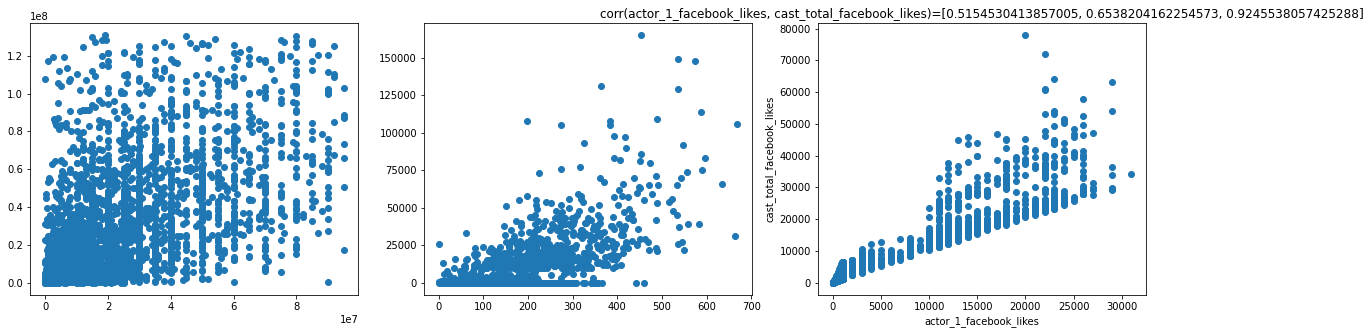

In [79]:
# 3.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']
df_cln_imdb = load_csv(file_name,col_names)
plot_high_correlated_scatters(df_cln_imdb[cols_for_correlations])
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [80]:
# 3.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


Part 3d. - Test 1 (name: test3d-1_plot_high_correlated_scatters, points: 0.1) - Sanity
	--->Testing the implementation of 'plot_high_correlated_scatters' ...

Good Job!
You've passed the 1st test for the implementation of the 'plot_high_correlated_scatters' method :-)


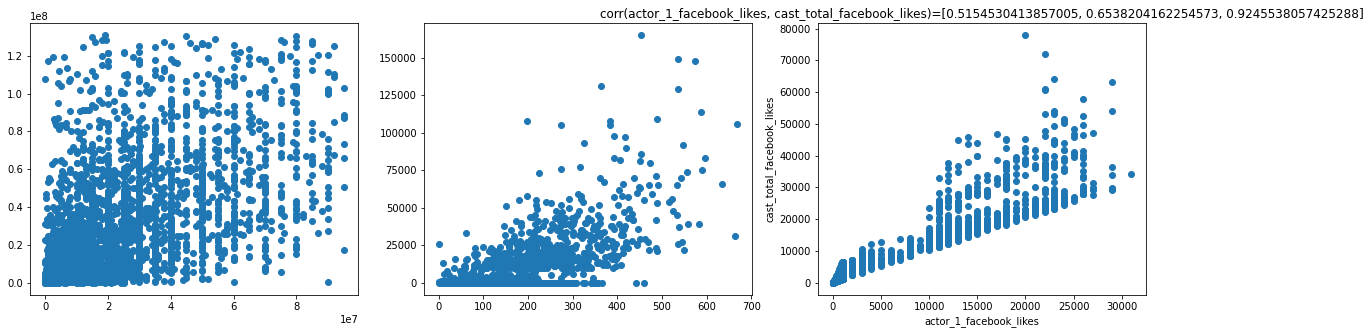

In [81]:
# 3.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3d. - Test 1 (name: test3d-1_plot_high_correlated_scatters, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'plot_high_correlated_scatters' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_imdb = load_csv(file_name,col_names)
    plot_high_correlated_scatters(df_cln_imdb[cols_for_correlations])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

print ("\nGood Job!\nYou've passed the 1st test for the implementation of the 'plot_high_correlated_scatters' method :-)")

Part 3d. - Test 2 (name: test3d-2_plot_high_correlated_scatters, points: 0.4)
	--->Testing the implementation of 'plot_high_correlated_scatters' ...

Good Job!
You've passed the 2nd test for the implementation of the 'plot_high_correlated_scatters' method :-)


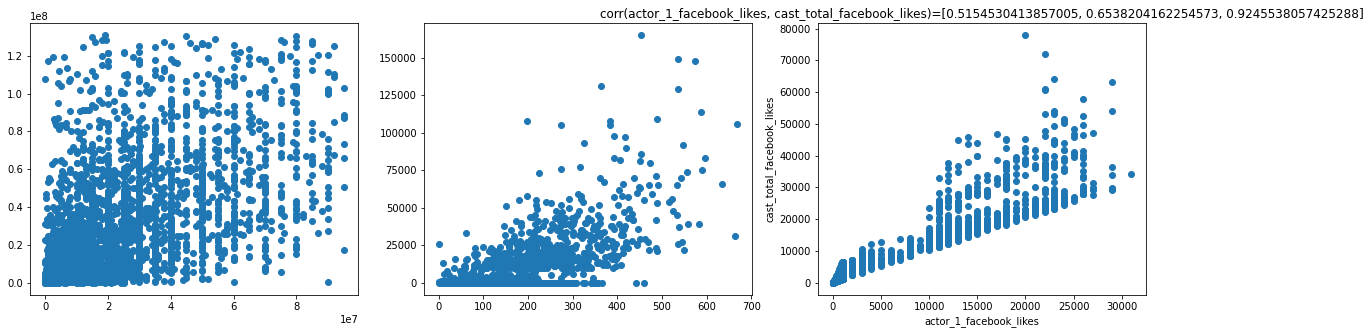

In [82]:
# 3.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3d. - Test 2 (name: test3d-2_plot_high_correlated_scatters, points: 0.4)")
print ("\t--->Testing the implementation of 'plot_high_correlated_scatters' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_imdb = load_csv(file_name,col_names)
    plot_high_correlated_scatters(df_cln_imdb[cols_for_correlations])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

all_axes = plt.gcf().get_axes()
assert len(all_axes)==3, 'Wrong number of subplots'

print ("\nGood Job!\nYou've passed the 2nd test for the implementation of the 'plot_high_correlated_scatters' method :-)")

Part 3d. - Test 3 (name: test3d-3_plot_high_correlated_scatters, points: 0.5)
	--->Testing the implementation of 'plot_high_correlated_scatters' ...

Good Job!
You've passed the 3rd test for the implementation of the 'plot_high_correlated_scatters' method :-)


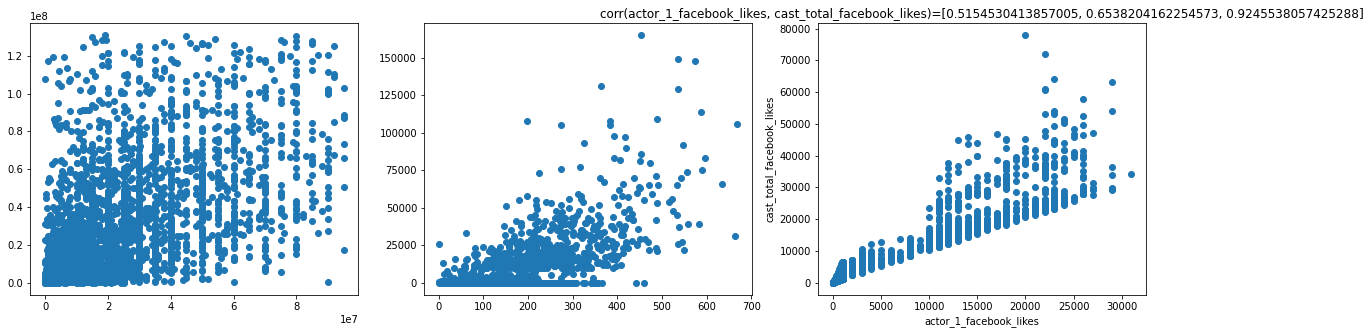

In [83]:
# 3.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3d. - Test 3 (name: test3d-3_plot_high_correlated_scatters, points: 0.5)")
print ("\t--->Testing the implementation of 'plot_high_correlated_scatters' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies_v1.5c.csv'
col_names = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 
             'duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
             'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'director_facebook_likes', 
             'movie_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']
cols_for_correlations = ['duration', 'facenumber_in_poster', 'budget', 'gross', 'imdb_score', 
                         'num_critic_for_reviews', 'director_facebook_likes', 'movie_facebook_likes', 
                         'actor_1_facebook_likes', 'cast_total_facebook_likes']

try:
    df_cln_imdb = load_csv(file_name,col_names)
    plot_high_correlated_scatters(df_cln_imdb[cols_for_correlations])
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:',str(e))
    print ('Try fixing your implementation')
    raise 

all_axes = plt.gcf().get_axes()
assert len(all_axes)==3, 'Wrong number of subplots'

cols=['title_year','imdb_score']
plot_testers = [mpc.PlotTester(all_axes[n_axis]) for n_axis in range(len(all_axes))]
spc_testers  = [ScatterPlotChecker(all_axes[n_axis]) for n_axis in range(len(all_axes))]
scatter_ydata_values   = [np.array([val for val in spc_testers[n_plot].y_data]) for n_plot in range(3)]
scatter_xdata_values   = [np.array([val for val in spc_testers[n_plot].x_data]) for n_plot in range(3)]
scatter_values_diffs = [scatter_ydata_values[n_plot]-scatter_xdata_values[n_plot] for n_plot in range(3)]
scatter_values_diffs_mean = [np.around(scatter_values_diff.mean(), decimals=2) for scatter_values_diff in scatter_values_diffs]
scatter_values_diffs_median = [np.around(np.median(scatter_values_diff), decimals=2) for scatter_values_diff in scatter_values_diffs]
for n_plot in range(3):
    curr_tested_axis = all_axes[n_plot]
    plot_testers[n_plot].assert_plot_type('scatter')
    assert scatter_values_diffs_mean[n_plot] == [6752841.14, 6134.92, 3070.32][n_plot], 'Wrong mean diff value for the %s column' %(cols[n_plot])
    assert scatter_values_diffs_median[n_plot] == [751256.5, 104.5, 1791.5][n_plot], 'Wrong median diff value for the %s column' %(cols[n_plot])

print ("\nGood Job!\nYou've passed the 3rd test for the implementation of the 'plot_high_correlated_scatters' method :-)")